## Get Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../input/train_set.csv')
val_df = pd.read_csv ('../input/val_set.csv')
test_df = pd.read_csv('../input/test_set.csv')

In [3]:
print(f'Train Set Shape: {train_df.shape}')
print(f'Validation Set Shape: {val_df.shape}')
print(f'Test Set Shape: {test_df.shape}')

Train Set Shape: (6000, 7)
Validation Set Shape: (1000, 7)
Test Set Shape: (1000, 7)


## Prepare Data

### Tokenize and Create Padded Sequences

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# Specify Size of Vocabulary
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size)  
tokenizer.fit_on_texts(train_df['News Text'])  

In [11]:
print (len(tokenizer.word_index))

54970


In [12]:
train_sequences = tokenizer.texts_to_sequences(train_df['News Text'])
val_sequences = tokenizer.texts_to_sequences(val_df['News Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['News Text'])

In [13]:
# specify max size of document
max_length = 100
# pad sequences
train_x = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_x = pad_sequences(val_sequences, maxlen=max_length, padding='post')
test_x = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [14]:
train_x.shape

(6000, 100)

In [15]:
val_x.shape

(1000, 100)

In [16]:
test_x.shape

(1000, 100)

### Get Label Data

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_df["Category"])
val_y = encoder.fit_transform(val_df["Category"])
test_y = encoder.transform (test_df["Category"])

In [19]:
print(f'train_y shape: {train_y.shape}')
print(f'val_y shape: {val_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_y shape: (6000,)
val_y shape: (1000,)
test_y shape: (1000,)


# Model Training

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D

### Function to Plot Losses

In [21]:
import matplotlib.pyplot as plt

def plot_losses(history):
    
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    epochs = range(len(train_loss))
    
    # Plot
    plt.plot(epochs, train_loss, label="Training Loss", color="blue")
    plt.plot(epochs, val_loss, label="Validation Loss", color="red")

    # Labels and legend
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

### Early Stopping Callback

In [22]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,
    restore_best_weights=True
)

## Model 1

In [30]:
# create model
model_1 = Sequential()
model_1.add(Embedding(vocab_size, 8))

model_1.add(Conv1D(32, 3, activation='relu'))
model_1.add(MaxPooling1D(2))

model_1.add(LSTM(4))
model_1.add(Dense(4, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [31]:
history_1 = model_1.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.4372 - loss: 1.2423 - val_acc: 0.8900 - val_loss: 0.6221
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9131 - loss: 0.4757 - val_acc: 0.9110 - val_loss: 0.3623
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9432 - loss: 0.2631 - val_acc: 0.9140 - val_loss: 0.3083
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9576 - loss: 0.1875 - val_acc: 0.9210 - val_loss: 0.3184
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9691 - loss: 0.1409 - val_acc: 0.9240 - val_loss: 0.3072
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9774 - loss: 0.1125 - val_acc: 0.9140 - val_loss: 0.3283
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9825 - loss: 0.0912 - val_acc: 0.9200 - val_loss: 0.3645
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9806 - loss: 0.0938 - val_acc: 0.9170 - val_loss: 0.3634
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - ac

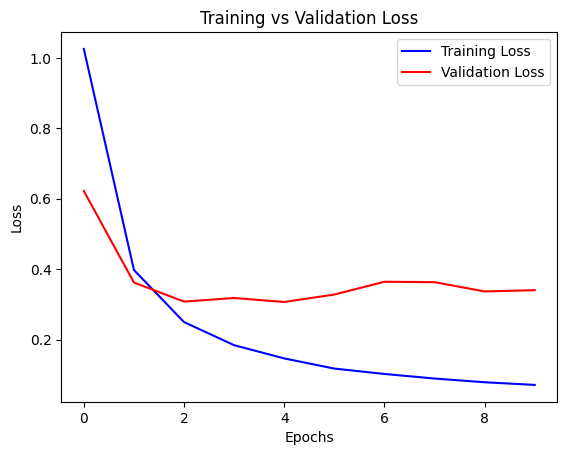

In [32]:
plot_losses(history_1)

### Conclusion: Reaches Overfitting Very Early. Performance is significantly better than a similar RNN model (4 nodes, embedding size = 8) without the Convolutional layers

## Model 2

### Increase Filter Size of Conv1D layer

In [37]:
# create model
model_2 = Sequential()
model_2.add(Embedding(vocab_size, 8))

model_2.add(Conv1D(64, 3, activation='relu'))
model_2.add(MaxPooling1D(2))

model_2.add(LSTM(4))
model_2.add(Dense(4, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [38]:
history_2 = model_2.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.4961 - loss: 1.1112 - val_acc: 0.8780 - val_loss: 0.4700
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9091 - loss: 0.3879 - val_acc: 0.9140 - val_loss: 0.3407
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9417 - loss: 0.2600 - val_acc: 0.9190 - val_loss: 0.3300
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.9625 - loss: 0.1828 - val_acc: 0.9110 - val_loss: 0.3322
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.9675 - loss: 0.1570 - val_acc: 0.9160 - val_loss: 0.3268
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.9740 - loss: 0.1253 - val_acc: 0.9140 - val_loss: 0.3402
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.9817 - loss: 0.0914 - val_acc: 0.9080 - val_loss: 0.3815
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.9812 - loss: 0.0902 - val_acc: 0.9090 - val_loss: 0.3634
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - ac

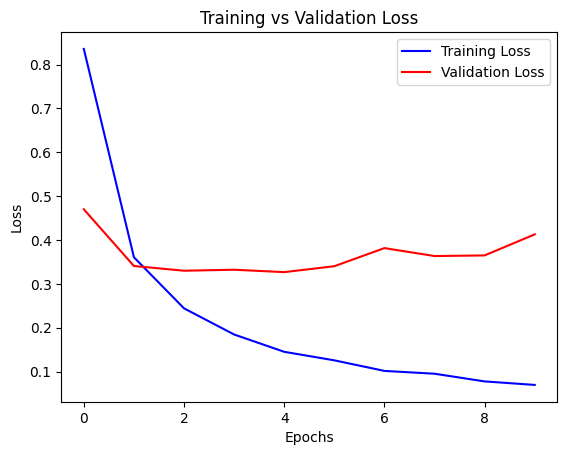

In [39]:
plot_losses(history_2)

### Conclusion: Increasing filter size slightly impairs performance

## Model 3

### Increase Kernel Size

In [40]:
# create model
model_3 = Sequential()
model_3.add(Embedding(vocab_size, 8))

model_3.add(Conv1D(32, 5, activation='relu'))
model_3.add(MaxPooling1D(2))

model_3.add(LSTM(4))
model_3.add(Dense(4, activation='sigmoid'))
model_3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [41]:
history_3 = model_3.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.4922 - loss: 1.1541 - val_acc: 0.8580 - val_loss: 0.5455
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8653 - loss: 0.4944 - val_acc: 0.8890 - val_loss: 0.4174
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9306 - loss: 0.2982 - val_acc: 0.9190 - val_loss: 0.3417
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9506 - loss: 0.2171 - val_acc: 0.9210 - val_loss: 0.3392
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9623 - loss: 0.1733 - val_acc: 0.9150 - val_loss: 0.3308
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9640 - loss: 0.1710 - val_acc: 0.9270 - val_loss: 0.2968
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9757 - loss: 0.1232 - val_acc: 0.9050 - val_loss: 0.3915
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9774 - loss: 0.1137 - val_acc: 0.9010 - val_loss: 0.3988
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - ac

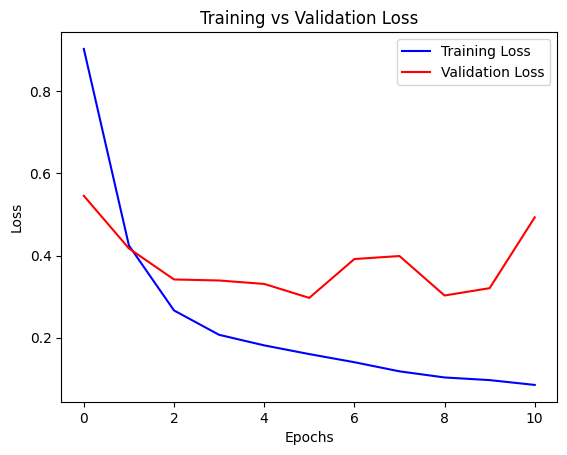

In [42]:
plot_losses(history_3)

### Conclusion: Increasing Kernel Size gives us a very slight performance boost

## Model 4

### Add  Convolutional layer

In [49]:
# create model
model_4 = Sequential()
model_4.add(Embedding(vocab_size, 8))

model_4.add(Conv1D(32, 5, activation='relu'))
model_4.add(MaxPooling1D(2))

model_4.add(Conv1D(64, 5, activation='relu'))
model_4.add(MaxPooling1D(2))


model_4.add(LSTM(4))
model_4.add(Dense(4, activation='sigmoid'))
model_4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [50]:
history_4 = model_4.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.5302 - loss: 1.0307 - val_acc: 0.8570 - val_loss: 0.4509
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8926 - loss: 0.3719 - val_acc: 0.8850 - val_loss: 0.3605
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9450 - loss: 0.2243 - val_acc: 0.8970 - val_loss: 0.3349
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9576 - loss: 0.1589 - val_acc: 0.9270 - val_loss: 0.2703
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9764 - loss: 0.1042 - val_acc: 0.9290 - val_loss: 0.2607
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9788 - loss: 0.0952 - val_acc: 0.9220 - val_loss: 0.2954
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9836 - loss: 0.0709 - val_acc: 0.9270 - val_loss: 0.3105
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9845 - loss: 0.0663 - val_acc: 0.9260 - val_loss: 0.3209
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

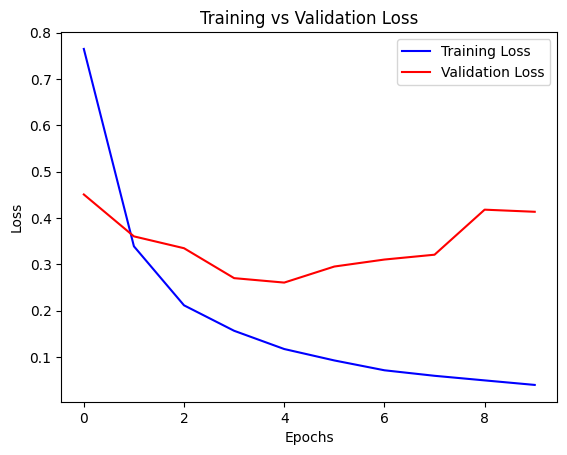

In [51]:
plot_losses(history_4)

### Conclusion: Adding another Convolutional layer improves performance, taking loss down to 0.2607

## Model 5

### Add LSTM nodes

In [66]:
# create model
model_5 = Sequential()
model_5.add(Embedding(vocab_size, 8))

model_5.add(Conv1D(32, 5, activation='relu'))
model_5.add(MaxPooling1D(2))

model_5.add(Conv1D(64, 5, activation='relu'))
model_5.add(MaxPooling1D(2))


model_5.add(LSTM(8))
model_5.add(Dense(4, activation='sigmoid'))
model_5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [67]:
history_5 = model_5.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5084 - loss: 1.0120 - val_acc: 0.8220 - val_loss: 0.5248
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8687 - loss: 0.4177 - val_acc: 0.8930 - val_loss: 0.3724
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9360 - loss: 0.2419 - val_acc: 0.9140 - val_loss: 0.3062
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9624 - loss: 0.1577 - val_acc: 0.9270 - val_loss: 0.2611
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9687 - loss: 0.1349 - val_acc: 0.9230 - val_loss: 0.2608
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9771 - loss: 0.1063 - val_acc: 0.9280 - val_loss: 0.2478
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9815 - loss: 0.0850 - val_acc: 0.9320 - val_loss: 0.2554
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9845 - loss: 0.0699 - val_acc: 0.9330 - val_loss: 0.2866
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

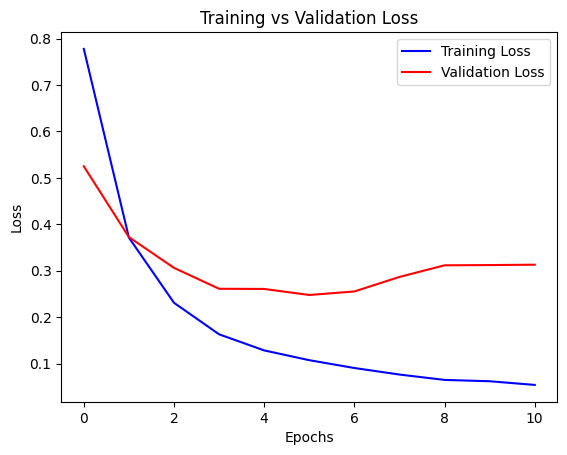

In [68]:
plot_losses(history_5)

### Conclusion: Increasing LSTM nodes to 8 brings a noticeable improvement in validation loss

## Model 6

### Increase LSTM Nodes

In [58]:
# create model
model_6 = Sequential()
model_6.add(Embedding(vocab_size, 8))

model_6.add(Conv1D(32, 5, activation='relu'))
model_6.add(MaxPooling1D(2))

model_6.add(Conv1D(64, 5, activation='relu'))
model_6.add(MaxPooling1D(2))


model_6.add(LSTM(16))
model_6.add(Dense(4, activation='sigmoid'))
model_6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [59]:
history_6 = model_6.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5155 - loss: 1.0240 - val_acc: 0.8270 - val_loss: 0.5324
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8686 - loss: 0.4173 - val_acc: 0.8790 - val_loss: 0.3778
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9316 - loss: 0.2472 - val_acc: 0.9180 - val_loss: 0.2481
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9537 - loss: 0.1612 - val_acc: 0.9220 - val_loss: 0.2794
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9712 - loss: 0.1122 - val_acc: 0.9250 - val_loss: 0.2738
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9780 - loss: 0.0926 - val_acc: 0.9430 - val_loss: 0.2367
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9770 - loss: 0.0946 - val_acc: 0.9330 - val_loss: 0.2657
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9800 - loss: 0.0833 - val_acc: 0.9370 - val_loss: 0.2506
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - ac

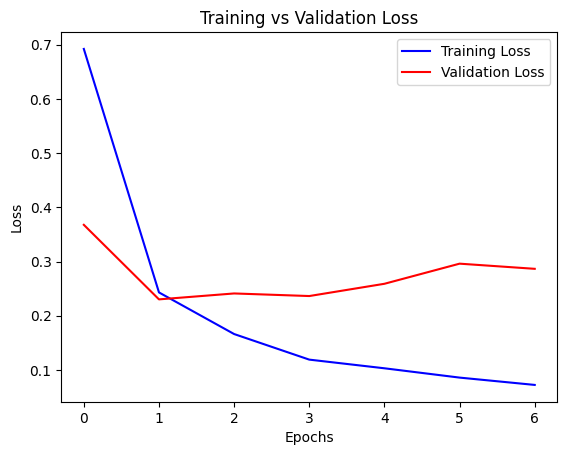

In [66]:
plot_losses(history_6)

### Conclusion: Increasing Nodes from 8 to 16 brings an improvement in both loss and accuracy

## Model 7

### Increase Embedding Size

In [69]:
# create model
model_7 = Sequential()
model_7.add(Embedding(vocab_size, 16))

model_7.add(Conv1D(32, 5, activation='relu'))
model_7.add(MaxPooling1D(2))

model_7.add(Conv1D(64, 5, activation='relu'))
model_7.add(MaxPooling1D(2))


model_7.add(LSTM(16))
model_7.add(Dense(4, activation='sigmoid'))
model_7.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [70]:
history_7 = model_7.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.5388 - loss: 0.9783 - val_acc: 0.8850 - val_loss: 0.3417
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9274 - loss: 0.2555 - val_acc: 0.9270 - val_loss: 0.2324
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9633 - loss: 0.1406 - val_acc: 0.9300 - val_loss: 0.2527
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9741 - loss: 0.1135 - val_acc: 0.9380 - val_loss: 0.2209
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9812 - loss: 0.0838 - val_acc: 0.9400 - val_loss: 0.2429
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9832 - loss: 0.0675 - val_acc: 0.9330 - val_loss: 0.2615
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9850 - loss: 0.0676 - val_acc: 0.9220 - val_loss: 0.3724
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9916 - loss: 0.0454 - val_acc: 0.9190 - val_loss: 0.3695
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - ac

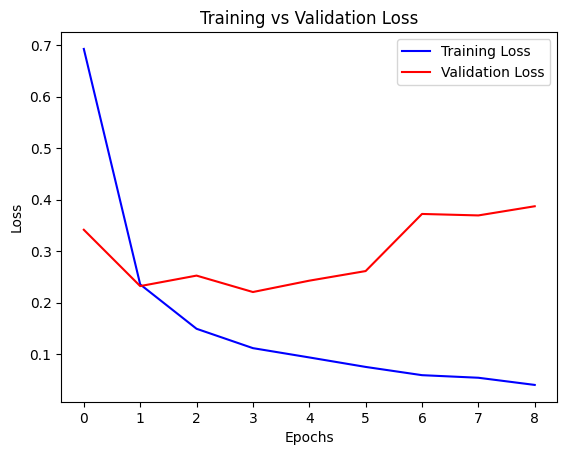

In [71]:
plot_losses(history_7)

### Conclusion: Increasing Embedding Size reduces validation los

## Model 8

### Increase Embedding Size

In [73]:
model_8 = Sequential()
model_8.add(Embedding(vocab_size, 32))

model_8.add(Conv1D(32, 5, activation='relu'))
model_8.add(MaxPooling1D(2))

model_8.add(Conv1D(64, 5, activation='relu'))
model_8.add(MaxPooling1D(2))


model_8.add(LSTM(16))
model_8.add(Dense(4, activation='sigmoid'))
model_8.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [74]:
history_8 = model_8.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.6056 - loss: 0.8808 - val_acc: 0.9210 - val_loss: 0.2646
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9543 - loss: 0.1839 - val_acc: 0.9190 - val_loss: 0.2740
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9703 - loss: 0.1266 - val_acc: 0.9340 - val_loss: 0.2581
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9768 - loss: 0.1090 - val_acc: 0.9440 - val_loss: 0.2209
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9839 - loss: 0.0759 - val_acc: 0.9440 - val_loss: 0.2755
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9887 - loss: 0.0565 - val_acc: 0.9390 - val_loss: 0.3086
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9914 - loss: 0.0398 - val_acc: 0.9380 - val_loss: 0.3027
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9898 - loss: 0.0442 - val_acc: 0.9340 - val_loss: 0.3498
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - ac

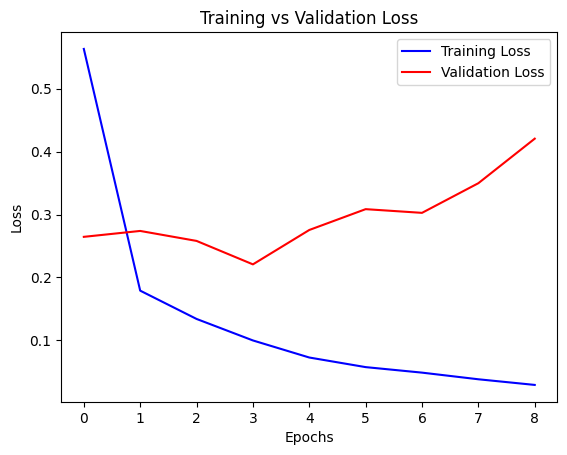

In [75]:
plot_losses(history_8)

### Conclusion: Increasing embedding size increases validation accuracy without affecting loss 

## Model 9

### Add L2 Regularisation

In [76]:
from keras.regularizers import l2

In [77]:
model_9 = Sequential()
model_9.add(Embedding(vocab_size, 32))

model_9.add(Conv1D(32, 5, activation='relu'))
model_9.add(MaxPooling1D(2))

model_9.add(Conv1D(64, 5, activation='relu'))
model_9.add(MaxPooling1D(2))


model_9.add(LSTM(16, kernel_regularizer=l2(0.001)))
model_9.add(Dense(4, activation='sigmoid'))
model_9.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [78]:
history_9 = model_9.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.6585 - loss: 0.8369 - val_acc: 0.9180 - val_loss: 0.2984
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9546 - loss: 0.1898 - val_acc: 0.9320 - val_loss: 0.2651
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.9708 - loss: 0.1365 - val_acc: 0.9280 - val_loss: 0.2995
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9789 - loss: 0.1016 - val_acc: 0.9420 - val_loss: 0.2396
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9839 - loss: 0.0815 - val_acc: 0.9440 - val_loss: 0.2440
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9875 - loss: 0.0673 - val_acc: 0.9420 - val_loss: 0.2483
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.9895 - loss: 0.0577 - val_acc: 0.9340 - val_loss: 0.2684
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9840 - loss: 0.0642 - val_acc: 0.9290 - val_loss: 0.3088
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step -

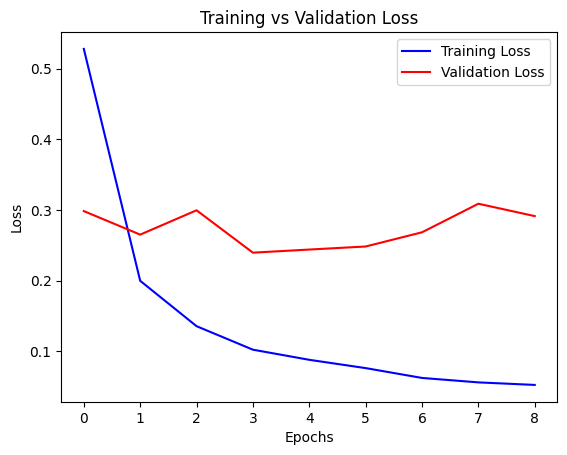

In [79]:
plot_losses(history_9)

### Conclusion: Regularisation increases the validation loss. However, since it hasnt had a negative impact on accuracy, we are choosing to keep it

# Get Metrics on Test Set

In [80]:
from sklearn.metrics import classification_report, accuracy_score

In [81]:
y_pred = model_9.predict(test_x)

# Get Label with highest probability
y_pred = y_pred.argmax(axis=1)  

# Generate classification report
report = classification_report(test_y, y_pred, digits=4)  
accuracy = accuracy_score(test_y, y_pred)  

print(report)
print(f"Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0     0.9514    0.9400    0.9457       250
           1     0.9315    0.9240    0.9277       250
           2     0.9269    0.9640    0.9451       250
           3     0.9714    0.9520    0.9616       250

    accuracy                         0.9450      1000
   macro avg     0.9453    0.9450    0.9450      1000
weighted avg     0.9453    0.9450    0.9450      1000

Accuracy: 0.9450
